In [1]:
import scqubits as scq
import numpy as np
import qutip as qt

 /home/yunwei/.local/lib/python3.8/site-packages/qutip/__init__.py: 66

In [172]:
fluxonium = scq.Fluxonium(
    EJ=3,
    EC=2,
    EL=5.,
    cutoff = 110,
    flux = 0.4,
    truncated_dim=4
)

energy = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

In [173]:
energy

array([ 0.        ,  7.76081271, 15.96554787, 24.58734211, 33.48778537,
       42.5647716 ])

In [167]:
fluxonium.phi_operator(energy_esys=True)

array([[-0.25823658, -1.14478756, -0.08234121, -0.00378082],
       [-1.14478756,  0.08639667, -1.6677658 ,  0.08970488],
       [-0.08234121, -1.6677658 ,  0.23918964,  2.06117493],
       [-0.00378082,  0.08970488,  2.06117493,  0.2096341 ]])

In [174]:
# result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
# result.plot_evals_vs_paramvals()

In [175]:
import numpy as np
from scipy.optimize import minimize

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Function to find the minimum
def find_minimum(EL, EJ, phi_ex, initial_guess=0):
    result = minimize(potential, x0=initial_guess, args=(EL, EJ, phi_ex))
    return result.x  # The value of phi at the minimum

# Example usage
EL = 5.0  # Example value for EL
EJ = 3.0  # Example value for EJ
phi_ex = 0.2*2*np.pi  # Example value for phi_ex
phi_min = find_minimum(EL, EJ, phi_ex)
print(f"Minimum value of phi: {phi_min[0]}")


Minimum value of phi: 0.43809066224035204


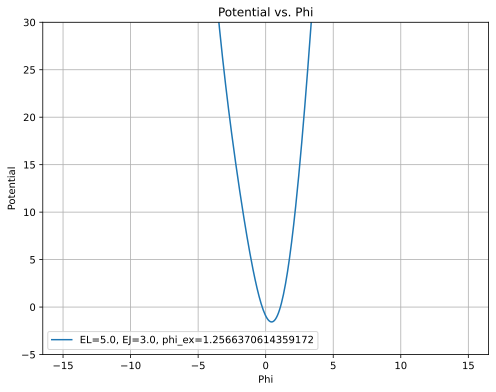

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function
def potential(phi, EL, EJ, phi_ex):
    return 0.5 * EL * phi**2 - EJ * np.cos(phi - phi_ex)

# Set the parameters
EL = 5.0  # Example value for EL
EJ = 3.0  # Example value for EJ
phi_ex = 0.2*2*np.pi # Example value for phi_ex

# Generate a range of phi values
phi_values = np.linspace(-15, 15, 400)

# Calculate the potential for each phi
potential_values = potential(phi_values, EL, EJ, phi_ex)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(phi_values, potential_values, label=f'EL={EL}, EJ={EJ}, phi_ex={phi_ex}')
plt.title('Potential vs. Phi')
plt.xlabel('Phi')
plt.ylabel('Potential')
plt.ylim(-5,30)
plt.grid(True)
plt.legend()
plt.show()


In [177]:
energy

array([ 0.        ,  7.76081271, 15.96554787, 24.58734211, 33.48778537,
       42.5647716 ])

In [178]:
fluxonium.phi_operator(energy_esys=True)[:7]

array([[-0.28952866, -1.00915167, -0.07364094, -0.01993052],
       [-1.00915167,  0.03232244, -1.38859818, -0.06199671],
       [-0.07364094, -1.38859818,  0.11228896, -1.66294009],
       [-0.01993052, -0.06199671, -1.66294009,  0.13045203]])

In [179]:
fluxonium.n_operator(energy_esys=True)[:7]

array([[0.-1.37848961e-18j, 0.+4.89489819e-01j, 0.+7.34823701e-02j,
        0.+3.06274101e-02j],
       [0.-4.89489819e-01j, 0.+2.88918684e-18j, 0.+7.12067521e-01j,
        0.+6.51993407e-02j],
       [0.-7.34823701e-02j, 0.-7.12067521e-01j, 0.-3.23181683e-18j,
        0.+8.96095456e-01j],
       [0.-3.06274101e-02j, 0.-6.51993407e-02j, 0.-8.96095456e-01j,
        0.-2.82484733e-18j]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

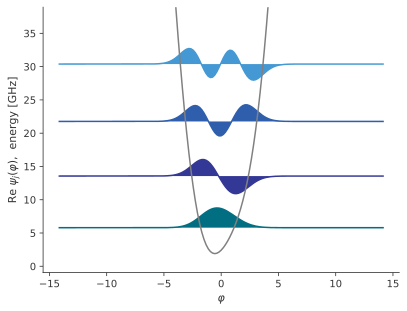

In [181]:
from scqubits.core.discretization import Grid1d
grid = Grid1d(-np.pi/4, np.pi/4, 100)
fluxonium.plot_wavefunction(-1)

In [9]:
fluxonium = scq.Fluxonium(
    EJ=4.9,
    EC=1.7,
    EL=0.4,
    cutoff = 110,
    flux = 0.5,
    truncated_dim=5
)

fluxonium.eigenvals() - fluxonium.eigenvals()[0]

array([ 0.        ,  0.40955116,  5.58039473,  8.02769749, 11.55391452,
       13.42375774])

In [51]:
# Set the base flux
base_flux = 0.5001
fluxonium.flux = base_flux
h=1e-6
# Compute eigenvalues at the base flux
eigenvals_base = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux + h
fluxonium.flux = base_flux + h
eigenvals_plus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute eigenvalues at base_flux - h
fluxonium.flux = base_flux - h
eigenvals_minus = fluxonium.eigenvals() - fluxonium.eigenvals()[0]

# Compute the central difference derivative
derivative = (eigenvals_plus - eigenvals_minus) / (2 * h)

In [52]:
derivative

array([0.        , 0.14933908, 0.06906656, 0.07813428, 0.07292409,
       0.0728751 ])

In [53]:
fluxonium.flux = base_flux
fluxonium.tphi_1_over_f_flux(1e-6,1,0)/1e3
# 42319.434199503296

242.2730194393916

In [54]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

In [55]:
9.37304957*4

37.49219828

In [56]:
fluxonium.n_operator(energy_esys=True)

array([[0.-1.35402897e-19j, 0.-7.02600741e-02j, 0.+2.28565850e-03j,
        0.+4.75898462e-01j, 0.-6.91312298e-04j],
       [0.+7.02600741e-02j, 0.-3.94608428e-20j, 0.+5.54502688e-01j,
        0.-1.95179416e-03j, 0.-2.04439142e-01j],
       [0.-2.28565850e-03j, 0.-5.54502688e-01j, 0.+2.68562425e-21j,
        0.-4.66099164e-01j, 0.+2.88781923e-04j],
       [0.-4.75898462e-01j, 0.+1.95179416e-03j, 0.+4.66099164e-01j,
        0.-3.57821928e-21j, 0.+8.08550087e-01j],
       [0.+6.91312298e-04j, 0.+2.04439142e-01j, 0.-2.88781923e-04j,
        0.-8.08550087e-01j, 0.-1.65836818e-20j]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

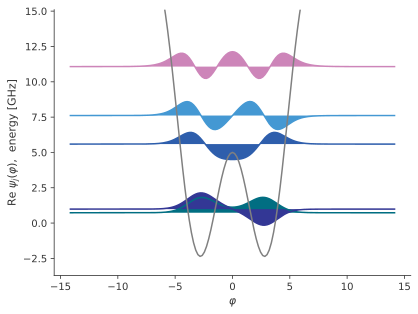

In [57]:
fluxonium.plot_wavefunction(-1)

In [58]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)

Spectral data:   0%|          | 0/100 [00:00<?, ?it/s]

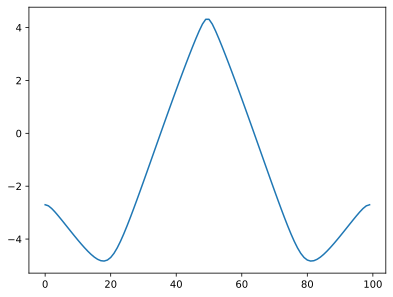

In [59]:
import matplotlib.pyplot as plt
plt.plot((result.energy_table)[:,2]-2*(result.energy_table)[:,1])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

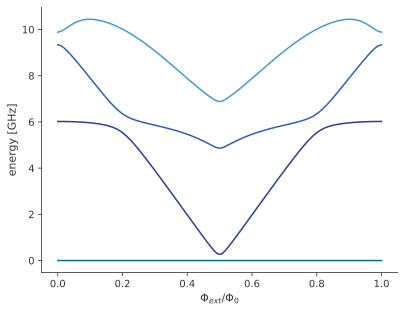

In [60]:
result = fluxonium.get_spectrum_vs_paramvals(param_name='flux', param_vals=np.linspace(0,1,100), evals_count=4, subtract_ground=True)
result.plot_evals_vs_paramvals()